<a href="https://colab.research.google.com/github/TajGama/Ajustamento-de-Observa-es-/blob/main/Exerc%C3%ADcio_Trabalhando_com_sistemas_de_coordenadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercícios 01 - Programação e Python - Trabalhando com sistemas de coordenadas

a) Crie um polígono a partir das coordenadas x e y dadas no arquivo coords.txt

b) Insira o polígono criado em um geodataframe

c) Salve o polígono em um shapefile

d) Plote e salve uma figure do polígono

[coords.txt](https://drive.google.com/file/d/1t609Mwwy2vrdSeDCJM9pBq9_Wmka0Sa-/view?usp=sharing), arquivo no meu drive.

#Importação das bibliotecas

  **import geopandas** é uma extensão do Pandas que possibilita a análise e manipulação de dados espaciais e georreferenciados nos diversos formatos

  **import matplotlib.pyplot** é uma coleção de funções de estilo de comando que fazem o matplotlib funcionar como o MATLAB. Cada função pyplot faz alguma alteração em uma figura: por exemplo, cria uma figura, cria uma área de plotagem em uma figura, plota algumas linhas em uma área de plotagem, decora a plotagem com rótulos, etc.

  **import shapely.geometry** Manipulação e análise de objetos geométricos no plano cartesiano. Shapely é um pacote Python licenciado pelo BSD para manipulação e análise de objetos geométricos planares.

 **import re** expressões regulares são compiladas em objetos padrão, que têm métodos para várias operações, tais como a procura por padrões de correspondência ou realizar substituições de strings.

 **from google.colab import files** e/ou **from google.colab import drive** para abrir arquivo diretamente do upload do arquivo ou diretamente do drive.

 **import gdown** downloads a public file/folder from Google Drive.

 **simplekml** É uma biblioteca Python para criação fácil de arquivos KML. Ela pode ser usada para converter um GeoDataFrame do GeoPandas para um formato KML que seja compatível com visualizadores de mapas

 **lxml** para o simplekml funcionar

 *Obs* - Usar !pip (package installer for Python) para certifique-se de que as bibliotecas gdown, simplekml, lxml, geopandas e matplotlib estão instaladas no seu IDE (integrated development environment ou ambiente de desenvolvimento integrado). Algumas não estão no basico do colab!

In [ ]:
!pip install geopandas matplotlib gdown simplekml lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 885.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65860 sha256=65d63e152cf0931d389d1155430cfb59f8de6c661d1e8bfed9e5bddef9284987
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml


## 1.Ler e processar as coordenadas do arquivo coords.txt

Abrir o arquivo txt do google drive e transforma num padrão para ser processado.


**Exemplo_CSV**

    https://drive.usercontent.google.com/u/0/uc?id=[FILE ID]&export=download

   drive.google.com/file/d/**1LIfVQrD3SHst-VECOA3Etk4mlhzc-apb** /view


**Sem o [ ] !**

    Prod_ = pd.read_csv("https://drive.usercontent.google.com/u/0/uc?id=1WdsKdGqNVkT3w_7VCSx0c0bvNYr8AUvX&export=download", sep=";",decimal=",")

Lembrar de compartilhar para **qualquer pessoa com o link!**

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import re
from google.colab import drive
from google.colab import files
import gdown
import simplekml



#### Formato do arquivo

O arquivo coords está no formato de **uma** linha e **varias** colunas.
Logo o programa foi criado para aceitar esse formato e com isso juntar numa matriz **xy**.

$$x= [x_1, x_2, x_3, ... , x_n]   $$

$$y= [y_1, y_2, y_3, ... , y_n]   $$

$$xy= [(x_1, y_1), (x_2, y_2), (x_3, y_3), ... , (x_n, y_n)]   $$

###~~Com importação do Google Drive~~

Não é ideal pois Pede autorização do dono do drive toda vez que é executado
e está ocorrendo erro.

In [ ]:
# Montar o Google Drive
#drive.mount('/content/drive')

# Definir o caminho para o arquivo no Google Drive
#file_path = '/content/drive/my-drive/AjustamentoIIUFPE/coords.txt'


# Ler o conteúdo do arquivo 'coords.txt'
#with open(file_path, 'r') as file:
#    content = file.read()

###Com o gdow

O mais simples e automatico a ser utilizado pois é so copiar o file ID do arquivo no drive e implementar duas linhas de codigo.

Não cria varias copias do coords.txt
Limite de no maximo 50 downloads (Limitação do google Drive)


In [ ]:
# ID do arquivo do Google Drive
file_id = '1t609Mwwy2vrdSeDCJM9pBq9_Wmka0Sa-'
# URL de download
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baixar o arquivo
output = 'coords.txt'
gdown.download(download_url, output, quiet=False)

# Ler o conteúdo do arquivo 'coords.txt'
with open('coords.txt', 'r') as file:
    content = file.read()


Downloading...
From: https://drive.google.com/uc?id=1t609Mwwy2vrdSeDCJM9pBq9_Wmka0Sa-
To: /content/coords.txt
100%|██████████| 218k/218k [00:00<00:00, 41.3MB/s]


### ~~Com o files~~

Utilizando isso vamos selecionar o arquivo no computador como um upload simples

Embora não seja tão pratico pois toda vez que é executado torna-se necessario a seleção do arquivo na pasta manualmente. Fazendo assim copias do coords.txt(n) no arquivo ao ser executado.

Vantagem de pode fazer com varios arquivos diferentes.



In [ ]:
# Fazer o upload do arquivo 'coords.txt'
#uploaded = files.upload()

# Ler o arquivo 'coords.txt'
#coords2 = pd.read_csv('coords.txt', header=None, names=['x', 'y'])

In [ ]:
#coords2

## 2.Juntar X e Y numa matriz unica

In [ ]:
# Extrair as coordenadas x e y usando regex
x_coords = re.findall(r"x= \[(.*?)\]", content)[0].split(',')
y_coords = re.findall(r"y= \[(.*?)\]", content)[0].split(',')

# Converter as coordenadas para float
x_coords = list(map(float, x_coords))
y_coords = list(map(float, y_coords))

# Combinar x e y em uma lista de tuplas
coords_tuples = list(zip(x_coords, y_coords))

#### Matrix X e Y combinada

In [ ]:
coords_tuples

[(333606.2023538671, 7362933.638975473),
 (333640.29035389214, 7361982.723975973),
 (333811.7203538375, 7361154.118976416),
 (334006.937353739, 7360992.221976502),
 (334119.9713536826, 7360956.197976516),
 (334193.43435364374, 7360932.784976532),
 (334662.173353408, 7360663.373976671),
 (334762.3853533595, 7360532.38797674),
 (335257.8533531074, 7360284.086976871),
 (335469.8493530032, 7360077.617976978),
 (335404.4943530464, 7359886.588977084),
 (335375.1063530736, 7359674.066977192),
 (335370.22035307565, 7359664.417977193),
 (335356.59035308374, 7359659.637977203),
 (335350.1103530858, 7359656.237977199),
 (335353.9103530833, 7359641.8879772145),
 (335355.67035308306, 7359635.177977217),
 (335357.2703530828, 7359630.737977218),
 (335360.7803530821, 7359624.75797722),
 (335364.0003530807, 7359621.097977225),
 (335367.83035407774, 7359620.267977225),
 (335373.1103530746, 7359618.3879772145),
 (335375.4203530743, 7359613.807977228),
 (335376.59035307175, 7359608.307977229),
 (335376.59

## 3.Polígono e Plot

In [ ]:
# Criar o polígono usando shapely
polygon = Polygon(coords_tuples)

In [ ]:
# Criar um GeoDataFrame
gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon])

In [ ]:
# Salvar o polígono em um shapefile
gdf.to_file("polygon.shp")

WGS 84 (World Geodetic System) (aka WGS 1984, **EPSG:4326**) é uma norma usada em cartografia de origem geocêntrica utilizado

Você pode usar o site epsg.io para confirmar o EPSG:

[EPSG.io:](https://epsg.io/) Find Coordinate Systems Worldwide

In [ ]:
# Salvar o polígono em um KML
#gdf.to_file("polygon.kml", driver='KML')

 trabalhando com **gdf.to_file("polygon.kml", driver='KML')** ocorre o erro abaixo.  

    ERROR:fiona._env:'polygon.kml' not recognized as a supported file format

podendo ser corrigido usando import abaixo com algumas modificações

    import fiona
    from fiona.drvsupport import supported_drivers

In [ ]:
kml = simplekml.Kml()

# Converta recursos GeoDataFrame em KML e adicione-os ao objeto KML
for _, row in gdf.iterrows():
    geom = row.geometry
    kml.newpolygon(name='Polygon', outerboundaryis=geom.exterior.coords[:])

kml.save("polygon.kml")

Em vez de usar o método from_geopandas que não esta funcionando, utilizar esse **for** que itera pelo GeoDataFrame, extraindo a geometria de cada linha e cria um novo polígono no objeto KML usando o método newpolygon. Isso faz alcançar o resultado desejado de salvar o GeoDataFrame como um arquivo KML.

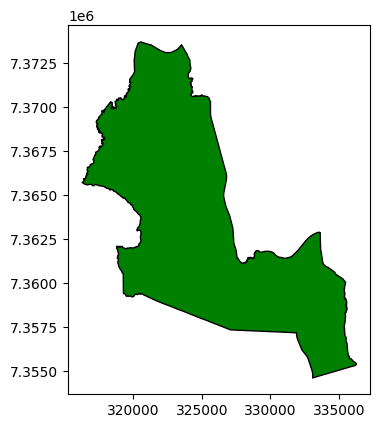

In [ ]:
# Plotar o polígono
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='green', edgecolor='black')

# Salvar a figura
plt.savefig('polygon.png')
plt.show()